#  Handwritten digit recognition
By Mugabi Trevor,

Today we take a look at Neural networks. The task here is to create a model such that can be able to classify hand written digits 0 to 9 . As a human thats an easy task for you , just looking at an image and knowing thats say a number 2 or so on but for a machine to know being showed images well then thats a whole different thing
so one of the requirements for this is alot of data to use for training and testing. lucky for just the MNIST dataset exists free for your exploration
stick with me here

note: using one layer for simplicity with 784 neurals

what you need for this: some statisitical knowledge in vector calculus, regression to understand whats happening underneath the hood.


In [ ]:
# importing the necessary mods
import tensorflow as tf # this is a deeplearning frame work by google ... there more like pytorch..etc
from tensorflow import keras # keras used to be a stand alone python lib for machince learning but now its baked into tf
import numpy as np  # the usual numpy for our data manipulation
import matplotlib.pyplot as plt #and yes ofcourse our visualisation tool
%matplotlib inline
 # this makes visuals appear in line in a jupyter notebook

splitting the data into a train and test sets

In [ ]:
(x_train,y_train) ,(x_test,y_test)= keras.datasets.mnist.load_data() # loading the dataset

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
#scaling the data .. ML is sensitive data must be clean and scaled if its too big
""" so before we continue .Did you know images have a pixel length and pixel width???
so an image  basically has an area it covers and pixels in that area will have to take
on specific values btn 0 and 255 that represent an image
0  for black, 255 for white .. """
# scaling data
x_train = x_train/255
x_test = x_test/255

' yes its easy for you a human to clearly know thats a 3 but a machine!!!!!\nwell it sees an array '

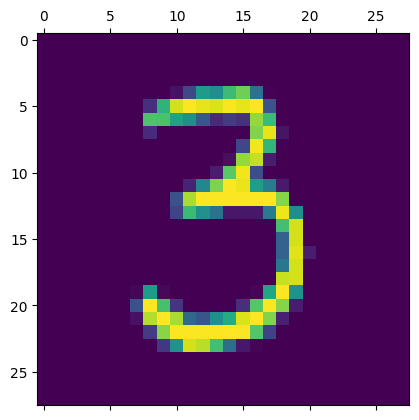

In [ ]:
 # example of the images we are to feed the model and have it tell us what number that is
plt.matshow(x_train[50])
""" yes its easy for you a human to clearly know thats a 3 but a machine!!!!!
well it sees an array """

In [ ]:
# viewing the shape of our data ..
x_train.shape

(60000, 28, 28)

the shape is in format (total entries,length of pixel ,width of pixel)

Reshaping my input from 28 by 28 pixel image

In [ ]:
# reshaping to feed each neural
x_train_flattened = x_train.reshape(len(x_train),(28**2))
x_train_flattened.shape

(60000, 784)

In [ ]:
# reshaping to feed each neural
x_test_flattened = x_test.reshape(len(x_test),(28**2))
x_test_flattened.shape

(10000, 784)

Describing the topology of the model

In [ ]:
# lets skip this part
model = keras.Sequential([
    keras.layers.Dense(
        784,   # my output layer since we trying to determine if number is btn 0 to 9 so 10
        input_shape=(784,), # my input layer of 784 neurals
        activation='sigmoid' #func to r
        ),
    keras.layers.Dense(
        784,
        activation='relu' #func to r
        ),
    keras.layers.Dense(
        10,
        activation='sigmoid' #func to r
        ),
])

model.compile(
    optimizer='adam', #optimizer
    loss='sparse_categorical_crossentropy',# the loss func
    metrics=['accuracy'] # metric to measure the model accuracy
)

Fitting the model on the data here below  now epochs are just the number of times

In [ ]:
model.fit(x=x_train_flattened,y=y_train, epochs=5) #An epoch is one complete pass through the entire training dataset

Epoch 1/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.3184 - accuracy: 0.9046
Epoch 2/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.1301 - accuracy: 0.9597
Epoch 3/5
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0816 - accuracy: 0.9748
Epoch 4/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0562 - accuracy: 0.9822
Epoch 5/5
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0401 - accuracy: 0.9872


its done training and claims to have 92.5% accuracy lets see...

In [ ]:
model.evaluate(x_test_flattened,y_test) #testing with test dataset and comparing its answer

313/313 [==============================] - 2s 5ms/step - loss: 0.0670 - accuracy: 0.9807


[0.06703659147024155, 0.9807000160217285]

still 92.5% accuracy.. lets test it

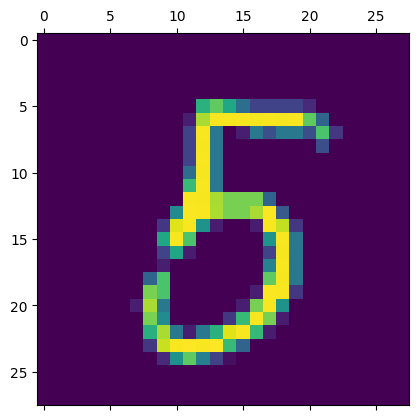

In [ ]:
plt.matshow(x_test[45]) # this is the point am to test with its cleary a 5 lets see what it gives back

In [ ]:
y_predicted = model.predict(x_test_flattened) # making it predict
 # its answer well what do you know? its correct



313/313 [==============================] - 2s 5ms/step


In [ ]:
y_predicted[45]


array([1.3793731e-03, 4.5369120e-04, 6.0264694e-07, 8.6155050e-02,
       7.1750515e-06, 9.9999976e-01, 4.5767429e-01, 7.0648716e-06,
       1.8028319e-01, 2.0911634e-01], dtype=float32)

In [ ]:
y_predicted_arg = [np.argmax(i) for i in y_predicted]

In [ ]:
y_predicted_arg[45]

5

we got a 5 back
